Perusahaan peminjaman sepeda di San Fransisco memintamu untuk menganalisa durasi perjalanan customer mereka. Untuk memudahkan analisa, lakukan hal-hal berikut ini:

## **STATISTIK DESKRIPTIF**

1. Lakukan perhitungan central tendency (mean, median, dan modus).
2. Lakukan pengecekan dispersi (standar deviasi, variance, dan range).
3. Lakukan pengecekan skewness dan kurtosis.
3. Analisa apakah ada data outlier berdasarkan sebaran datanya.
4. Cari tahu berapa persentase outlier terhadap data keseluruhan.
5. Bagaimana perubahan pemusatan data sebelum dan sesudah penghapusan outlier?

## **API**

Buatlah API untuk:
- `Menampilkan` seluruh entry data setelah dilakukan handling outlier.
- `Menghapus` entry data, dari data yang telah dihandling outlier.

clue:
- Load data csv yang sudah diolah dengan pandas, kemudian konversi data ke dictionary `df.to_dict()` atau json `df.to_json()` untuk dapat diolah lebih lanjut dengan API menggunakan FastAPI.
- Pembuatan API dilakukan pada script `.py`
- Endpoint dan penamaan function pada API dibebaskan.


---



Data dapat diakses dari BigQuery dengan ketentuan:

- Project_id: `bigquery-public-data`
- Dataset: `san_francisco_bikeshare`
- Table: `bikeshare_trips`
- Ambil hanya kolom `duration_sec` saja
- Berikan LIMIT pada data yang diambil sebesar 3000 entry data

Koneksikan data di atas menggunakan `BigQuery` ke Google Colab dengan code berikut:
```py
from google.colab import auth
from google.cloud import bigquery
auth.authenticate_user()
print('Authenticated')

  project_id = "rock-wonder-317907" #GUNAKAN GCP PROJECT-ID KALIAN MASING-MASING
client = bigquery.Client(project=project_id)
```

Untuk melakukan Query menggunakan cara ini, kamu dapat menggunakan method `client.query('Masukkan Querynya').to_dataframe()`. Outputnya akan berupa Pandas dataframe, sehingga harus import Pandas.

Contoh:

```py
df = client.query('''
SELECT *
FROM `bigquery-public-data.thelook_ecommerce.orders`
WHERE created_at < "2022-07-01"
ORDER BY year,month ASC
''').to_dataframe()
```



In [9]:
# Working area
from google.colab import auth
from google.cloud import bigquery
from scipy import stats
auth.authenticate_user()
print('Authenticated')

project_id = "pc-api-5133159006662443041-958" #GUNAKAN GCP PROJECT-ID KALIAN MASING-MASING
client = bigquery.Client(project=project_id)

df = client.query('''
SELECT duration_sec
FROM `bigquery-public-data.san_francisco_bikeshare.bikeshare_trips`
LIMIT 3000
''').to_dataframe()

print(df)

Authenticated
      duration_sec
0             2781
1              501
2              367
3              462
4              489
...            ...
2995           756
2996          1248
2997           780
2998           676
2999          1387

[3000 rows x 1 columns]


In [17]:
print(df["duration_sec"].mean())
print(df["duration_sec"].median())
print(df["duration_sec"].mode().values[0])

756.992
482.0
355.0


In [16]:
df["duration_sec"] = df["duration_sec"].astype(float)
print(df["duration_sec"].std())
print(df["duration_sec"].var())
print(df["duration_sec"].max())
print(df["duration_sec"].min())
print(df["duration_sec"].max() - df["duration_sec"].min())

2525.7454665880327
6379390.161989999
83115.0
61.0
83054.0


In [15]:
res = stats.normaltest(df['duration_sec'])
print(f'p-value: {res.pvalue}') #ga normal

p-value: 0.0


In [18]:
res = stats.shapiro(df['duration_sec'])
print(f'p-value: {res.pvalue}') #ga normal

p-value: 4.190451496852578e-80


<Axes: >

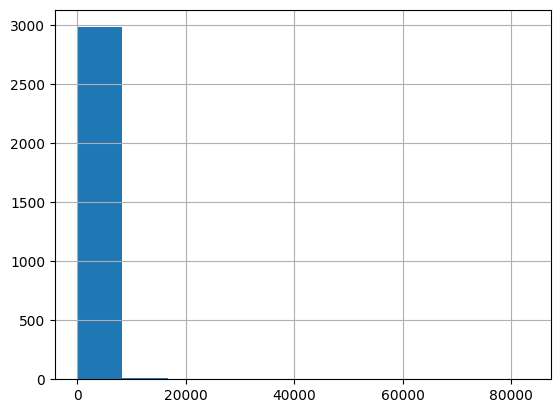

In [19]:
df['duration_sec'].hist()

In [20]:
print(f"Skewness: {df['duration_sec'].skew()}")

Skewness: 25.000505359432687


In [21]:
print(f"Kurtosis: {df['duration_sec'].kurtosis()}")

Kurtosis: 727.2287818326724


In [47]:
q1 = df['duration_sec'].quantile(0.25)
q3 = df['duration_sec'].quantile(0.75)
iqr = q3-q1

up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

the_upper = df[(df['duration_sec'] > up_bound) | (df['duration_sec'] < low_bound)]
print(the_upper)
len(the_upper) / len(df['duration_sec']) * 100

Upper Boundary: 1473.00
Lower Boundary: -391.00
      duration_sec
0           2781.0
17          1497.0
34          1684.0
36          1504.0
37          3210.0
...            ...
2875        1698.0
2931        2457.0
2939        1562.0
2945        2115.0
2962        1826.0

[158 rows x 1 columns]


5.266666666666667

In [23]:
avg = df['duration_sec'].mean()
std = df['duration_sec'].std()

up_bound = avg + 3*std
low_bound = avg - 3*std

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

Upper Boundary: 8334.23
Lower Boundary: -6820.24


In [40]:
outlier = df['duration_sec'][(df['duration_sec']<low_bound) | (df['duration_sec']>up_bound)]
no_outlier = df['duration_sec'][(df['duration_sec']>=low_bound) & (df['duration_sec']<=up_bound)]

print(len(outlier))
print(f'Percentage of outliers: {len(outlier)*100/len(df["duration_sec"]):.2f}%')

17
Percentage of outliers: 0.57%


In [35]:
print(df["duration_sec"].mean())
print(df["duration_sec"].median())
print(df["duration_sec"].mode().values[0])

print(no_outlier.mean())
print(no_outlier.median())
print(no_outlier.mode().values[0])

756.992
482.0
355.0
627.1223600402279
479.0
355.0
